In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
seeds = pd.read_csv("./seeds_dataset.txt", sep="\t")
print("数据形状: ", seeds.shape)

数据形状:  (210, 8)


In [3]:
# 处理数据
seeds_data = seeds.iloc[:, :7].values
seeds_target = seeds.iloc[:, 7].values
sees_names = seeds.columns[:7]
stdScale = StandardScaler().fit(seeds_data)
seeds_dataScale = stdScale.transform(seeds_data)

In [4]:
# 构建并训练模型
kmeans = KMeans(n_clusters=3, random_state=42).fit(seeds_data)
print("构建的KMeans模型为: \n", kmeans)

构建的KMeans模型为: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


In [5]:
# 评价KMeans
from sklearn.metrics import calinski_harabaz_score

In [8]:
for i in range(2, 7):
    # 构建并训练模型 - 值越大越好
    kmeans = KMeans(n_clusters=i, random_state=123).fit(seeds_data)
    score = calinski_harabaz_score(seeds_data, kmeans.labels_)
    print("seeds数据聚类%d类calinski_harabaz指数为: %f"%(i, score))

seeds数据聚类2类calinski_harabaz指数为: 351.179992
seeds数据聚类3类calinski_harabaz指数为: 375.804961
seeds数据聚类4类calinski_harabaz指数为: 327.835320
seeds数据聚类5类calinski_harabaz指数为: 310.331840
seeds数据聚类6类calinski_harabaz指数为: 302.473069


In [11]:
# 聚类可视化
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

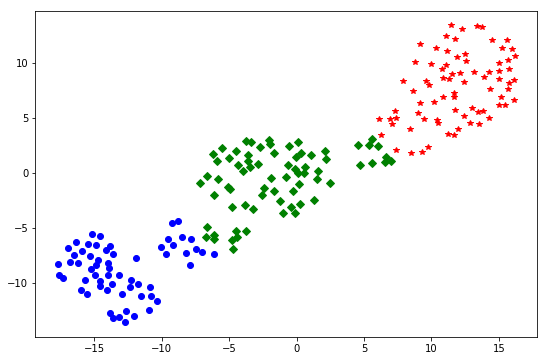

In [16]:
# 使用TSNE降维
tsne = TSNE(n_components=2, init="random", random_state=177).fit(seeds_data)
df = pd.DataFrame(tsne.embedding_)
kmeans = KMeans(n_clusters=3, random_state=123).fit(seeds_data)
df['labels'] = kmeans.labels_
# 提取数据
df1 = df[df['labels'] == 0]
df2 = df[df['labels'] == 1]
df3 = df[df['labels'] == 2]
# 绘图
fig = plt.figure(figsize=(9, 6))
plt.plot(df1[0], df1[1], 'bo', \
        df2[0], df2[1], 'r*', \
        df3[0], df3[1], 'gD')
plt.show()